In [76]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from statistics import mean
from scipy.optimize import curve_fit
import scipy

from NUC_functions import create_NUC_df, collapse_df,compile_NUC_matrix_input,calc_NUC_coef


In [188]:
#choose filepath to desired data
path = 'C:\\Users\\khart\Documents\\IRCSP2_data\calibration_data\LUT\\2221\\long_exposure\\'
cal_file1 = 'cam1_50.0c.h5'
cal_file2 = 'cam2_50.0c.h5'

In [189]:
#will create a df and print the names of the keys in the original hdf5 file
df1 = create_NUC_df(path,cal_file1)
df2 = create_NUC_df(path,cal_file2)
df2

,images1,temp1
0,"[[23930, 23934, 23930, 23919, 23939, 23943, 23...",25.3
1,"[[23837, 23857, 23850, 23866, 23854, 23838, 23...",25.6
2,"[[23763, 23748, 23762, 23752, 23762, 23762, 23...",26.0
3,"[[23668, 23671, 23671, 23706, 23672, 23673, 23...",26.4
4,"[[23627, 23616, 23623, 23612, 23618, 23597, 23...",26.7
...,...,...
95,"[[22419, 22451, 22451, 22447, 22449, 22454, 22...",33.9
96,"[[22409, 22443, 22443, 22448, 22457, 22446, 22...",33.9
97,"[[22421, 22457, 22464, 22454, 22459, 22460, 22...",33.9
98,"[[22431, 22443, 22449, 22441, 22454, 22438, 22...",33.9


In [190]:
#select ROI
ymin1 = 100; ymax1 = 145;
ymin2 = 125; ymax2 = 170;

temps = [20,25,51,65,70,75]

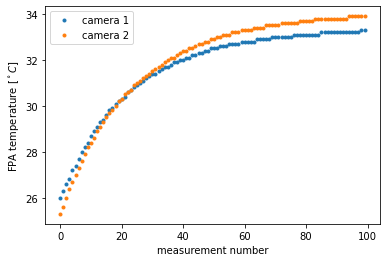

In [191]:
plt.plot(df1['temp1'],'.',label='camera 1')
plt.plot(df2['temp1'],'.',label='camera 2')
plt.xlabel('measurement number')
plt.ylabel('FPA temperature [$^\circ C$]')
plt.legend()
plt.show()

In [192]:
# pixel fit 
def f(T, m, b,rc): # this is your 'straight line' y=f(x)
    dt = 21 - T; #delta T,T ref is 21
    return A*x**2 + B

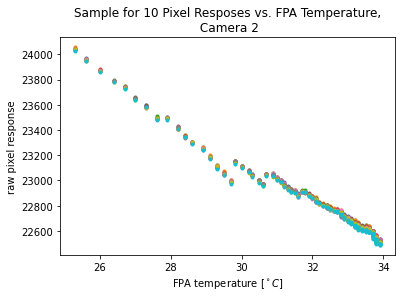

In [194]:
for j in range(10):
    values = np.zeros(100)
    for i in range(100):
        im = df2['images1'][i];
        values[i] = im[150+j,150]
    plt.plot(df2['temp1'],values,'.')

plt.xlabel('FPA temperature [$^\circ C$]')   
plt.ylabel('raw pixel response')
plt.title('Sample for 10 Pixel Resposes vs. FPA Temperature,\n Camera 2')
plt.show()    


In [195]:
bbtemps1 = [];bbtemps2 = []; temps1 =[];temps2 = []; images1 =[]; images2 = [];

for t in temps:
    #choose filepath to desired data
    path =  'C:\\Users\\khart\Documents\\IRCSP2_data\calibration_data\LUT\\2221\\'
    cal_file1 = 'cam1_'+str(t)+'.0c.h5'
    cal_file2 = 'cam2_'+str(t)+'.0c.h5'
    df1 = create_NUC_df(path,cal_file1)
    df2 = create_NUC_df(path,cal_file2)
    t1,i1 = collapse_df(df1)
    t2,i2 = collapse_df(df2)
    bbtemps1.extend(np.ones(len(t1))*t)
    bbtemps2.extend(np.ones(len(t2))*t)
    temps1.extend(t1)
    temps2.extend(t2)
    images1.extend(i1)
    images2.extend(i2)
        

In [172]:
data1= {'bbtemp': bbtemps1, 'temps1': temps1,'images1':list(images1)}
data2= {'bbtemp': bbtemps2, 'temps1': temps2,'images1':list(images2)}
len(bbtemps1)

319

In [173]:
cam1 = pd.DataFrame.from_dict(data1)
cam2 = pd.DataFrame.from_dict(data2)

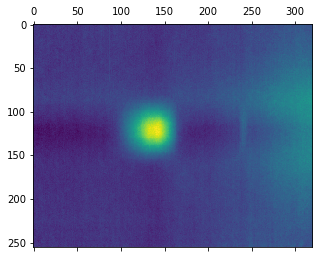

In [176]:
plt.matshow(cam1['images1'][318])

In [177]:
avg1 = cam1['images1'].map(lambda x: x.mean())
avg2 = cam2['images1'].map(lambda x: x.mean())

cam1['avg']=avg1
cam2['avg']=avg2

Text(0.5, 0, 'Avg. .tiff ')

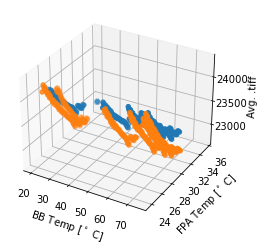

In [178]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cam1['bbtemp'], cam1['temps1'], cam1['avg'])
ax.scatter(cam2['bbtemp'], cam2['temps1'], cam2['avg'])
ax.set_xlabel('BB Temp [$^\circ$ C]')
ax.set_ylabel('FPA Temp [$^\circ$ C]')
ax.set_zlabel('Avg. .tiff ')

In [179]:
T_ref, tFPAS, rs = compile_NUC_matrix_input(cam1)
T_ref2, tFPAS2, rs2 = compile_NUC_matrix_input(cam2)

In [180]:
ymin1 = 105; ymax1 = 140;
ymin2 = 130; ymax2 = 165;

m1 = np.zeros([256,320]); b1= np.zeros([256,320]);

for i in range(320):
    for j in range(256):
        m,b = calc_NUC_coef(tFPAS,rs,i,j)
        m1[j,i] = m
        b1[j,i] = b

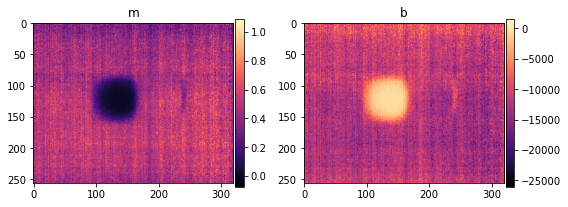

In [181]:
plt.rcParams["axes.grid"] = False
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('figure', titlesize=50)  # fontsize of the figure title

fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

ax1, ax2 = axes

im1 = ax1.imshow(m1,cmap ='magma')#,vmin = -40, vmax = 40)
im2 = ax2.imshow(b1,cmap ='magma')#vmin =-0.5e6,vmax =0.5e6)

ax1.title.set_text('m')
ax2.title.set_text('b')

fig.colorbar(im1, ax=ax1,fraction=0.04, pad=0.01)
fig.colorbar(im2, ax=ax2,fraction=0.04, pad=0.01)

fig.tight_layout()

plt.show()


In [165]:
m2 = np.zeros([256,320]); b2= np.zeros([256,320]);

for i in range(320):
    for j in range(256):
        m,b = calc_NUC_coef(tFPAS2,rs2,i,j)
        m2[j,i] = m
        b2[j,i] = b

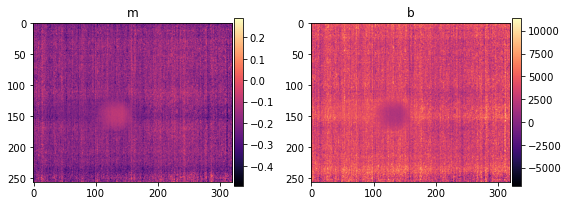

In [166]:
plt.rcParams["axes.grid"] = False
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('figure', titlesize=50)  # fontsize of the figure title

fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

ax1, ax2 = axes

im1 = ax1.imshow(m2,cmap ='magma')
im2 = ax2.imshow(b2,cmap ='magma')

ax1.title.set_text('m')
ax2.title.set_text('b')

fig.colorbar(im1, ax=ax1,fraction=0.04, pad=0.01)
fig.colorbar(im2, ax=ax2,fraction=0.04, pad=0.01)

fig.tight_layout()

plt.show()


In [19]:
#writetohdf5

#choose filepath to desired data
save_path = '/Users/kirahart/Dropbox/GitHub/IRCSP2_data/calibration_files/'
name =  "NUC" 

#create hdf5 file
hf = h5py.File(save_path + name + '.h5', 'w')
hf.create_dataset('/m1',  data=m1)
hf.create_dataset('/b1',  data=b1)
hf.create_dataset('/T_ref1',  data=T_ref)
hf.create_dataset('/m2',  data=m2)
hf.create_dataset('/b2',  data=b2)
hf.create_dataset('/T_ref2',  data=T_ref2)
hf.close()